<a href="https://colab.research.google.com/github/3bdo-Yahya/Image-Processing/blob/main/Section_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(np.float64(-0.5), np.float64(1825.5), np.float64(2018.5), np.float64(-0.5))

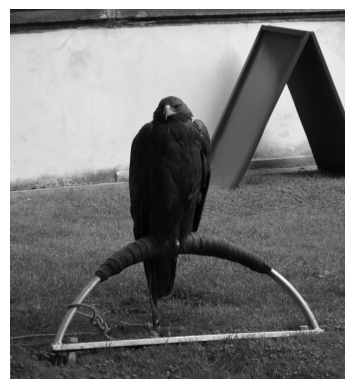

In [2]:
from skimage import data
image = data.eagle()
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
plt.imshow(image); plt.axis('off')

In [3]:
print(image.shape)  # Print the shape of the image

(2019, 1826, 3)


In [4]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [5]:
# Initialize empty noise array matching grayscale image dimensions
gauss_noise = np.zeros(image_gray.shape, dtype=np.uint8)

In [6]:
# Optional cell

# Calculate mean and standard deviation from the image (alternative: use defaults mean=128, stddev=20)
mean, stddev = cv2.meanStdDev(image_gray)

# Display calculated mean and standard deviation values
print(mean, stddev)

[[108.26574405]] [[71.46528805]]


In [7]:
# Fill the gauss_noise array with random values from Gaussian distribution
cv2.randn(gauss_noise, mean, stddev)

array([[108, 120,  58, ..., 174, 162,  80],
       [137, 171,  72, ..., 255,  15,  33],
       [176,  29,  74, ...,  79, 129, 123],
       ...,
       [214, 131, 134, ..., 144,  53,   0],
       [  0, 161, 144, ..., 184,  92, 134],
       [217, 121,  57, ..., 134, 202, 180]], dtype=uint8)

In [8]:
# Scale down noise intensity by 50% to make it less aggressive
gauss_noise = (gauss_noise * 0.5).astype(np.uint8)

In [9]:
# Add Gaussian noise to the grayscale image
image_gauss_noisy = cv2.add(image_gray, gauss_noise)

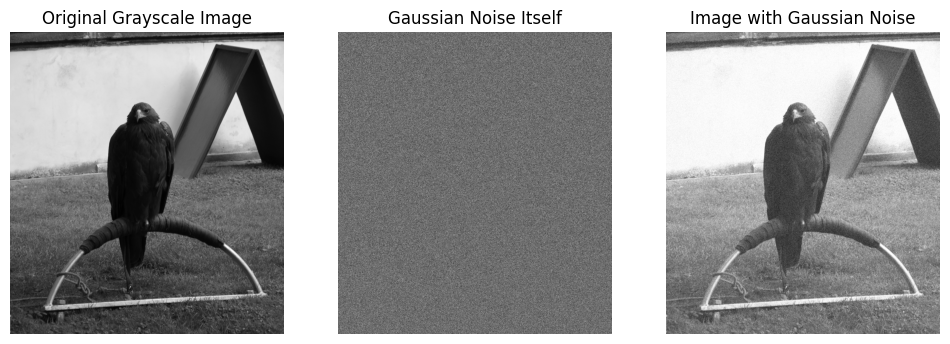

In [10]:
# Display original, noise, and noisy image side by side for comparison
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(image_gray, cmap='gray'); plt.axis('off')
plt.title('Original Grayscale Image')
plt.subplot(1, 3, 2)
plt.imshow(gauss_noise, cmap='gray'); plt.axis('off')
plt.title('Gaussian Noise Itself')
plt.subplot(1, 3, 3)
plt.imshow(image_gauss_noisy, cmap='gray'); plt.axis('off')
plt.title('Image with Gaussian Noise')
plt.show()

In [11]:
# Apply Gaussian blur (5x5 kernel) to reduce Gaussian noise

# cv2.GaussianBlur(your_image, (ksize, ksize), sigmaX)
# sigmaX is the standard deviation of the Gaussian kernel

image_gauss_blur = cv2.GaussianBlur(image_gauss_noisy, (5, 5), 0)

In [12]:
# Apply averaging blur (50x50 kernel) for strong smoothing effect
image_blur = cv2.blur(image_gauss_noisy, (50, 50))

In [13]:
# Apply median blur (49x49 kernel) - effective for salt-and-pepper noise
image_med_blur = cv2.medianBlur(image_gauss_noisy, 49)

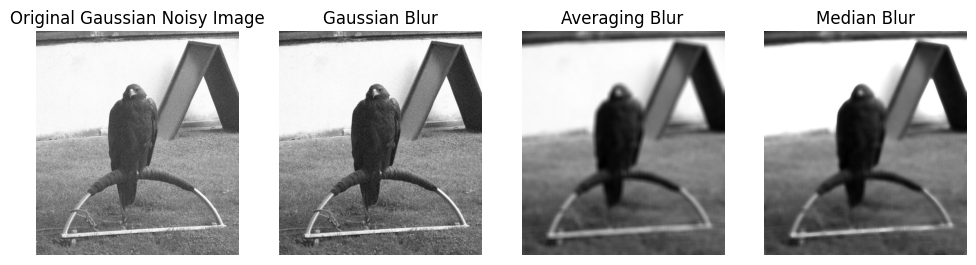

In [14]:
plt.figure(figsize=(12, 12))
plt.subplot(1, 4, 1)
plt.imshow(image_gauss_noisy, cmap='gray'); plt.axis('off')
plt.title('Original Gaussian Noisy Image')
plt.subplot(1, 4, 2)
plt.imshow(image_gauss_blur, cmap='gray'); plt.axis('off')
plt.title('Gaussian Blur')
plt.subplot(1, 4, 3)
plt.imshow(image_blur, cmap='gray'); plt.axis('off')
plt.title('Averaging Blur')
plt.subplot(1, 4, 4)
plt.imshow(image_med_blur, cmap='gray'); plt.axis('off')
plt.title('Median Blur')
plt.show()

In [15]:
# Apply Laplacian operator for edge detection (highlights rapid intensity changes)
laplacian_blur = cv2.Laplacian(image, cv2.CV_64F, ksize=3)

In [16]:
# Convert Laplacian to absolute values and scale to uint8 for proper display
laplacian_blur_abs = cv2.convertScaleAbs(laplacian_blur)

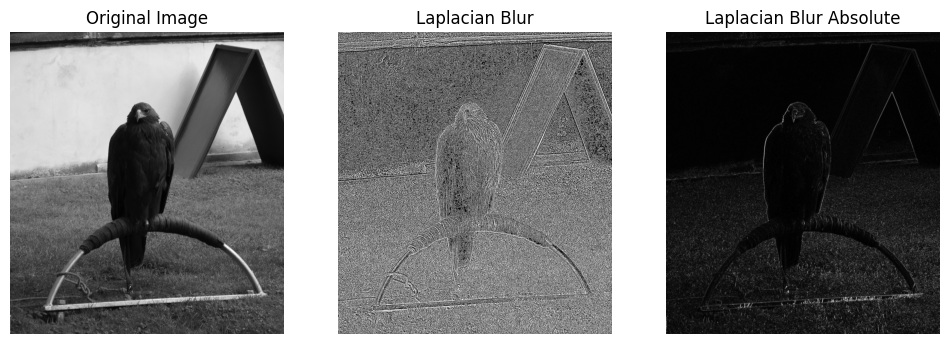

In [17]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray'); plt.axis('off')
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(laplacian_blur, cmap='gray'); plt.axis('off')
plt.title('Laplacian Blur')
plt.subplot(1, 3, 3)
plt.imshow(laplacian_blur_abs, cmap='gray'); plt.axis('off')
plt.title('Laplacian Blur Absolute')
plt.show()

In [18]:
# Implementation

In [19]:
# sample 3x3 patch

patch = np.array([[10, 10, 10],
                  [10, 50, 10],
                  [10, 10, 10]])

# Laplacian Kernel
laplacian_kernel = np.array([[-1, -1, -1],
                             [-1, 8, -1],
                             [-1, -1, -1]])

# Implement convolution
patch_conv = np.sum(patch * laplacian_kernel)
print("Lablacian Convolution Result: ", patch_conv)

Lablacian Convolution Result:  320


In [20]:
# 3x3 patch
patch = np.array([[10, 20, 30],
                  [20, 40, 20],
                  [30, 20, 10]])

# 3x3 Gaussian Kernel (we divide by 16 to normalize the result)
gaussian_kernel = np.array([[1, 2, 1],
                            [2, 4, 2],
                            [1, 2, 1]]) / 16

# Implement convolution
patch_conv = np.sum(patch * gaussian_kernel)
print("Gaussian Convolution Result: ", patch_conv)

Gaussian Convolution Result:  25.0


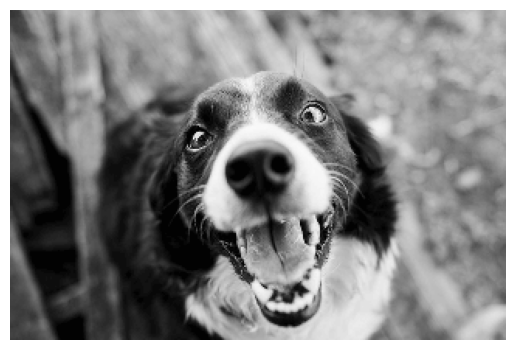

In [36]:
# using matplotlib and numpy
import matplotlib.image as img

dog = img.imread("123.jpg")

w, h = dog.shape[:2]

xNew, yNew = int(w/2), int(h/2)

# Calculate scaling factor, and round to nearest integer
# work for more than 2 pixels
xScale, yScale = xNew/(w-1), yNew/(h-1)

# taking a matrix of xNew width and yNew height
# with 4 attributes (r, g, b, alpha)
new_image = np.zeros([xNew, yNew, 4])

for i in range(xNew):
    for j in range(yNew):
        new_image[i, j] = dog[int(i/xScale), int(j/yScale)]

plt.imshow(new_image); plt.axis('off')

# Save the image after scaling
img.imsave('scaled.png', new_image)